In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('C:/Users/Drew/Documents/Datasets/Energy/Global Electricity Statistics.csv')

In [3]:
data.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


In [4]:
data.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


In [5]:
data.tail()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1605,Trinidad and Tobago,distribution losses,Central & South America,0.244,0.21,0.152,0.326,0.36,0.407,0.337,...,0.239,0.234,0.245,0.248,0.253,0.274864,0.425807,0.424101,0.422757,0.422757
1606,Turks and Caicos Islands,distribution losses,Central & South America,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,...,0,0,0,0,0,0.014,0.0125,0.0125,0.0125,0.01277172
1607,U.S. Virgin Islands,distribution losses,Central & South America,0.05243,0.05537,0.05607,0.05761,0.05789,0.05922,0.06055,...,0.063,0.06,0.06,0.06,0.065,0.065,0.05,0.051,0.051,0.051
1608,Uruguay,distribution losses,Central & South America,0.55,0.426,0.627,0.662,0.78,0.702,0.911,...,1.292,1.282,1.253,1.49,1.608,1.694491,1.557257,1.322331,1.129273,1.129273
1609,Venezuela,distribution losses,Central & South America,5.145,3.597,6.113,6.623,5.386,6.818,8.605,...,25.113,25.627,42.699,40.381,33.543,32.237348,30.982821,25.637959,23.099784,23.04704156


In [6]:
data.loc[132]

Country              Japan
Features    net generation
Region      Asia & Oceania
1980               546.764
1981               546.029
1982               553.199
1983               586.835
1984               618.331
1985               638.364
1986               643.521
1987               693.668
1988               725.328
1989               763.506
1990               813.348
1991               840.404
1992               848.558
1993                856.06
1994                911.02
1995               935.922
1996             955.00903
1997               985.076
1998               991.287
1999               996.945
2000               983.184
2001               965.017
2002               982.598
2003               973.485
2004              1001.921
2005              1011.127
2006              1028.619
2007              1069.041
2008              1003.209
2009               974.935
2010           1079.223897
2011           1044.066672
2012           1043.550711
2013           1027.427071
2

For this analysis, I will pick Japan as the target variable. I will manually create a new DataFrame cause i dont know how to convert columns to my index XD

In [7]:
japan = {
    '1980': [546.764],
    '1981': [546.029],
    '1982': [553.199],
    '1983': [586.835],
    '1984': [618.331],
    '1985': [638.364],
    '1986': [643.521],
    '1987': [693.668], 
    '1988': [725.328],
    '1989': [763.506],
    '1990': [813.348],
    '1991': [840.404],
    '1992': [848.558],
    '1993': [856.06],
    '1994': [911.02],
    '1995': [935.922],
    '1996': [955.00903],
    '1997': [985.076],
    '1998': [991.287],
    '1999': [996.945],
    '2000': [983.184],
    '2001': [965.017],
    '2002': [982.598],
    '2003': [973.485],
    '2004': [1001.921],
    '2005': [1011.127],
    '2006': [1028.619],
    '2007': [1069.041],
    '2008': [1003.209],
    '2009': [974.935],
    '2010': [1079.223897],
    '2011': [1044.066672],
    '2012': [1043.550711],
    '2013': [1027.427071],
    '2014': [1027.238336],
    '2015': [1003.029903],
    '2016': [1002.320654], 
    '2017': [1005.866632],
    '2018': [1008.910122],
    '2019': [988.9822695],
    '2020': [960.7846955],
    '2021': [954.8569816]
}

In [9]:
japan_data = pd.DataFrame.from_dict(japan,  orient='index', columns=['Electricity Usage'])

In [10]:
japan_data.head()

,Electricity Usage
1980,546.764
1981,546.029
1982,553.199
1983,586.835
1984,618.331


In [11]:
japan_data.isnull().sum()

Electricity Usage    0
dtype: int64

In [12]:
japan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1980 to 2021
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Electricity Usage  42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


# Data Visualization

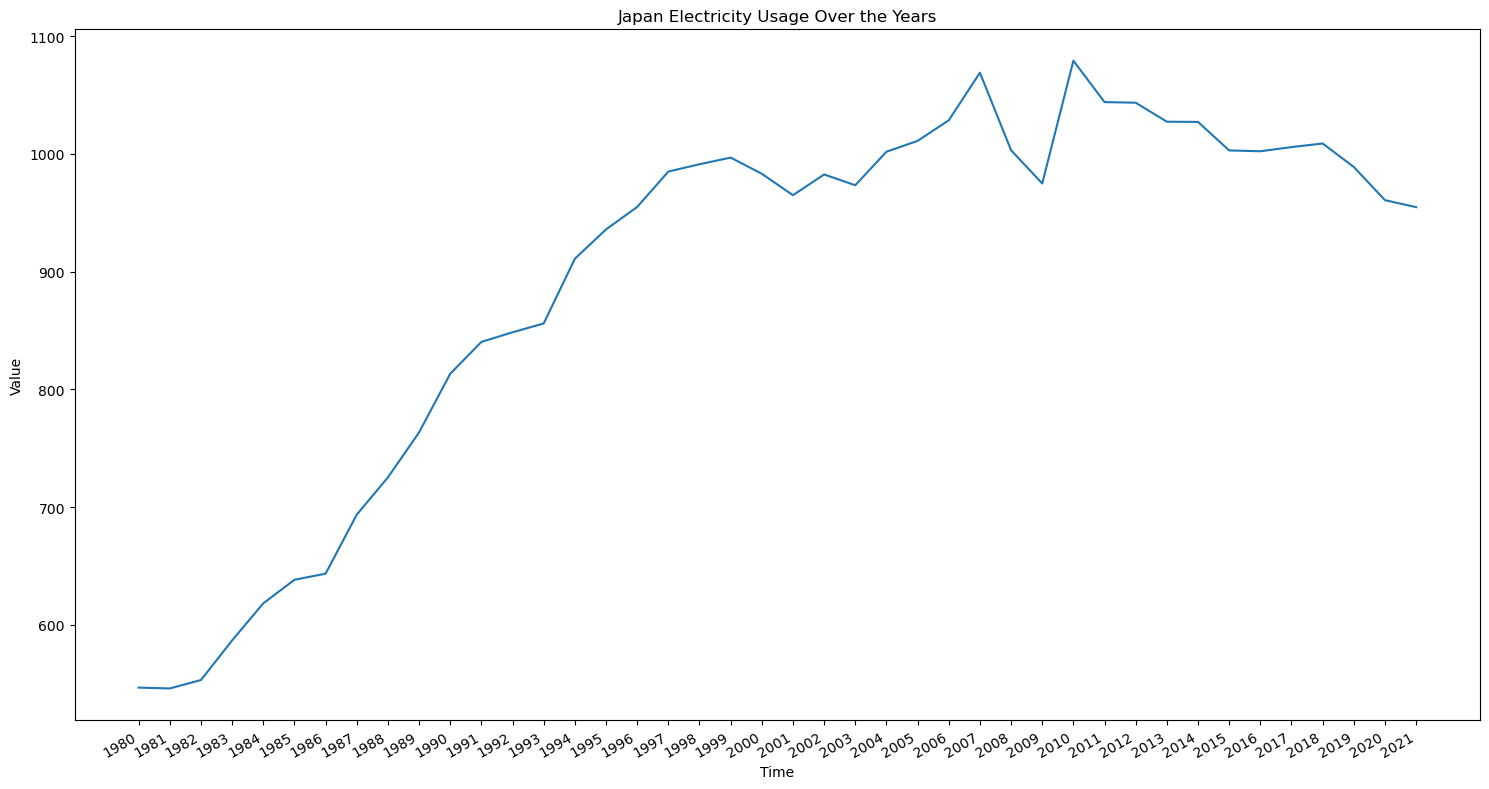

In [13]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(japan_data['Electricity Usage'], label='Electric Usage')
ax.set_title('Japan Electricity Usage Over the Years')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,42,1))
pt.tight_layout()

There is an upward trend. No seasonality (obviously)

R-Value:  0.8449749516951688
P-Value:  1.9730882728342677e-12
Std Err:  1.1238052192526176


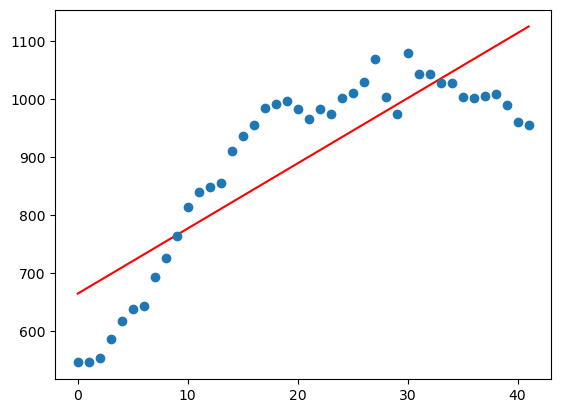

In [14]:
xi = np.arange(0,42)
y = japan_data['Electricity Usage']

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

print('R-Value: ' , r_value)
print('P-Value: ' , p_value)
print('Std Err: ' , std_err)

line = slope*xi  + intercept
pt.plot(xi, line, 'r', xi, y, 'o')
pt.show()


The electricity usage is linear with time

In [15]:
std_dev = japan_data['Electricity Usage'].std()
print(f' Standard Deviation: {std_dev}')

mean = np.mean(japan_data['Electricity Usage'])
print(f' Mean: {mean}')

coef_var = (std_dev / mean)*100
print(f' Coefficient Variance: {coef_var} %')

 Standard Deviation: 163.0396053925324
 Mean: 894.9659041571429
 Coefficient Variance: 18.217409695186003 %


# Moving Average Window

In [19]:
japan_data['Moving Average (2)'] = japan_data['Electricity Usage'].rolling(window=2).mean()
japan_data['Moving Average (5)'] = japan_data['Electricity Usage'].rolling(window=5).mean()

In [20]:
japan_data.head(20)

,Electricity Usage,Moving Average (10),Moving Average (30),Moving Average (2),Moving Average (5)
1980,546.76400,NaN,NaN,NaN,NaN
1981,546.02900,NaN,NaN,546.396500,NaN
1982,553.19900,NaN,NaN,549.614000,NaN
1983,586.83500,NaN,NaN,570.017000,NaN
1984,618.33100,NaN,NaN,602.583000,570.231600
1985,638.36400,NaN,NaN,628.347500,588.551600
1986,643.52100,NaN,NaN,640.942500,608.050000
1987,693.66800,NaN,NaN,668.594500,636.143800
1988,725.32800,NaN,NaN,709.498000,663.842400
1989,763.50600,631.554500,NaN,744.417000,692.877400


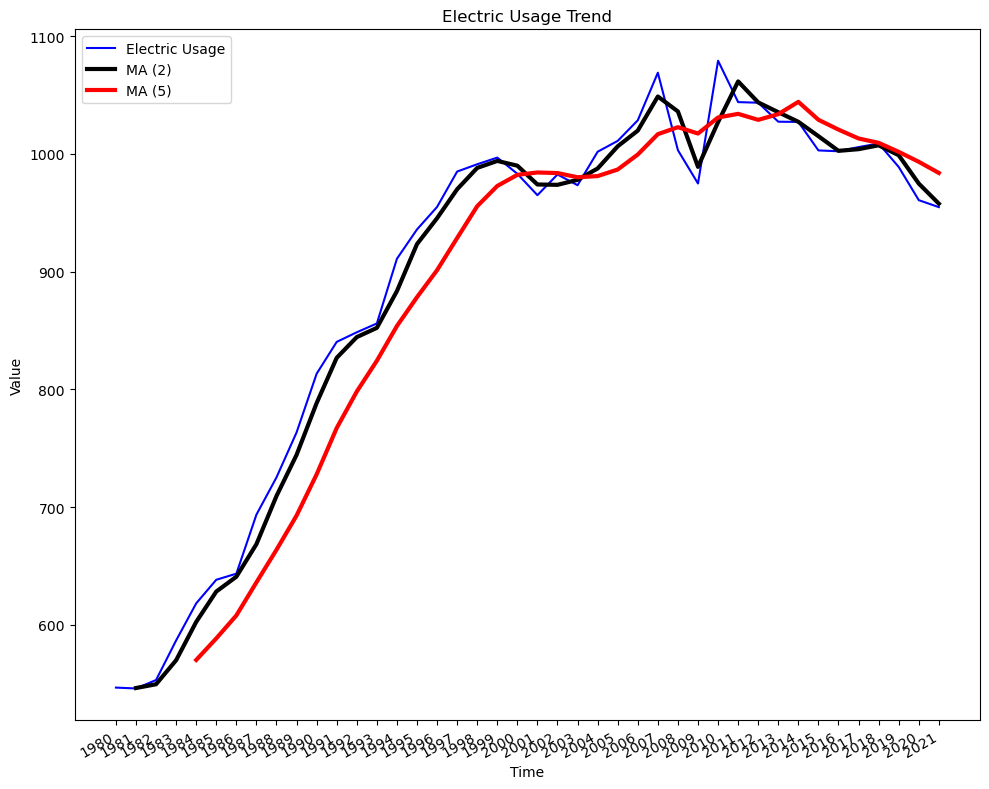

In [22]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(japan_data['Electricity Usage'], 'b-', label='Electric Usage')
ax.plot(japan_data['Moving Average (2)'], 'k-',label='MA (2)', linewidth=3)
ax.plot(japan_data['Moving Average (5)'], 'r-', label='MA (5)', linewidth=3)
ax.set_title('Electric Usage Trend')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,42, 1))
fig.autofmt_xdate()
pt.tight_layout()

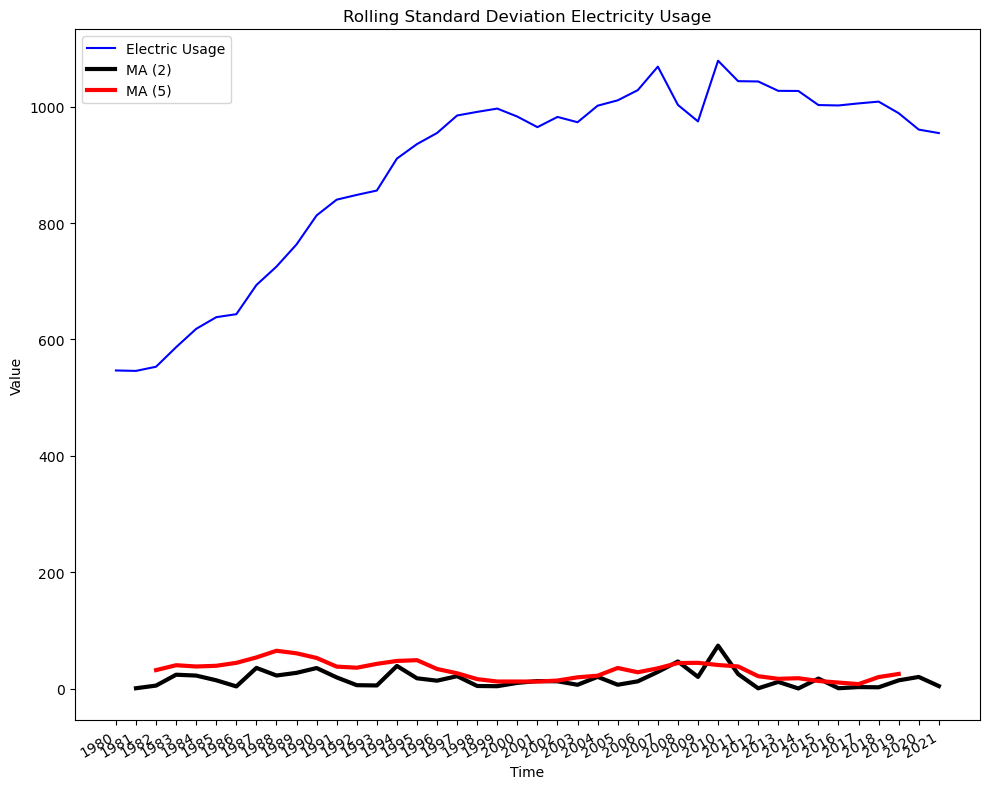

In [23]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(japan_data['Electricity Usage'], 'b-', label='Electric Usage')
ax.plot(japan_data['Electricity Usage'].rolling(window=2, center=True).std(), 'k-', label='MA (2)', linewidth=3)
ax.plot(japan_data['Electricity Usage'].rolling(window=5, center=True).std(), 'r-', label='MA (5)', linewidth=3)
ax.set_title('Rolling Standard Deviation Electricity Usage')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,42, 1))
fig.autofmt_xdate()
pt.tight_layout()

The standard deviation is fairly constant

# XGBoosting For Feature Importance (Not required because it has only 1 column) - Not necessary to use XGBoost

# Stationary Check

In [24]:
adf_results = adfuller(japan_data['Electricity Usage'])
print(f' ADF Statistic: {adf_results[0]}')
print(f' P-Value: {adf_results[1]}')

 ADF Statistic: -2.71809312489719
 P-Value: 0.07095935694449618


In [25]:
adf_results = adfuller(np.diff(japan_data['Electricity Usage'], n=1))
print(f' ADF Statistic: {adf_results[0]}')

if adf_results[1] < 0.05:
    print(f' P-Value: {adf_results[1]}')
    print(' The time series is stationary')
else:
    print(f' P-Value: {adf_results[1]}')
    print('The Time Series is not stationary')

 ADF Statistic: -5.9228321558724035
 P-Value: 2.4831342895037237e-07
 The time series is stationary


In [26]:
data_diff = np.diff(japan_data['Electricity Usage'], n=1)

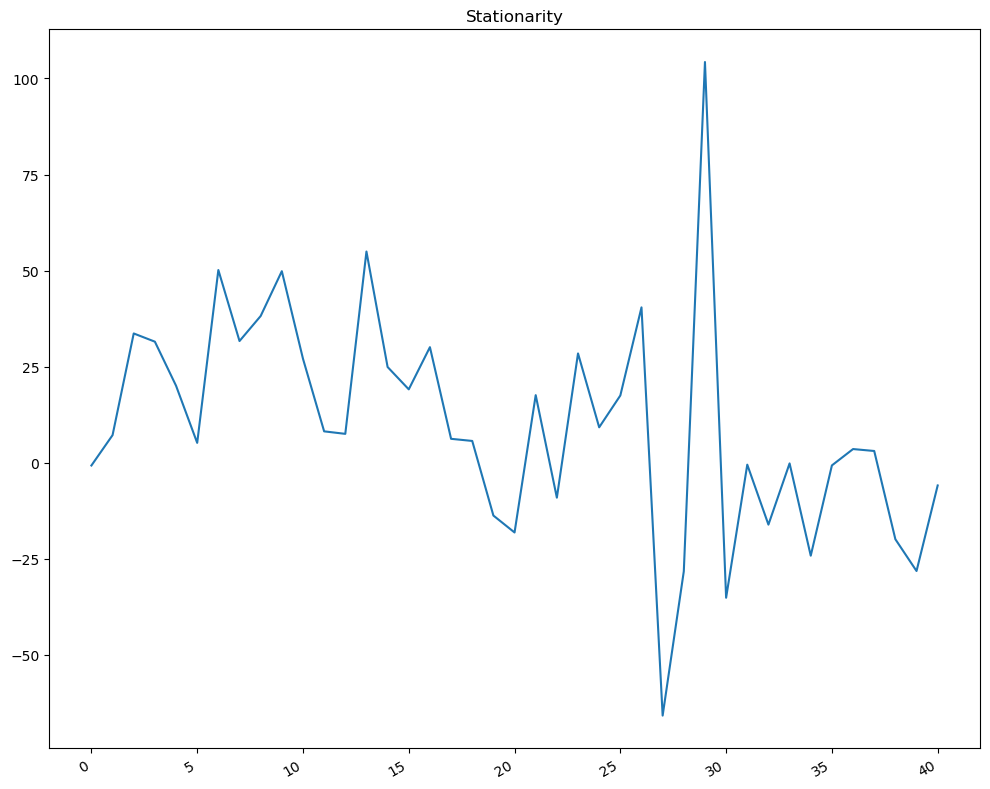

In [27]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data_diff)
ax.set_title('Stationarity')
fig.autofmt_xdate()
pt.tight_layout()

First-Order integration. The mean is constant and the variance is constant as well. No presence of trend

<function plot_acf at 0x000002110D9B8FE0>


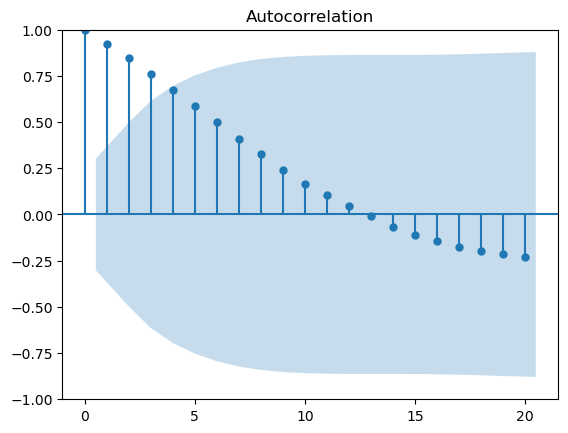

In [28]:
plot_acf(japan_data['Electricity Usage'], lags=20)
print(plot_acf)

<function plot_pacf at 0x000002110D9B8EA0>


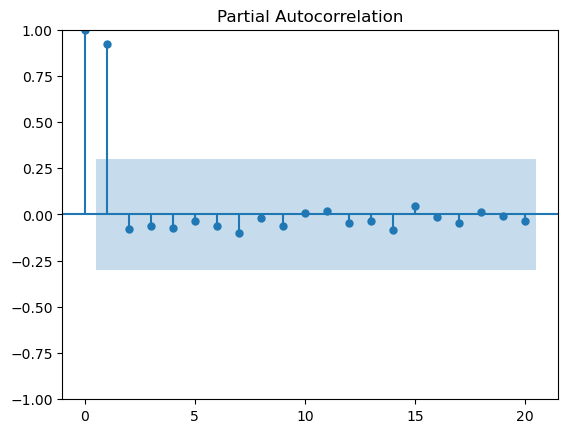

In [29]:
plot_pacf(japan_data['Electricity Usage'], lags=20)
print(plot_pacf)

# Model Selection

In [30]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    results = []  # Initialize an empty list to store results
    for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.
        try:
            # Fit an ARIMA(p,d,q) model using the SARIMAX function.
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic  # Calculate the model AIC
            results.append([order, aic])
        except Exception as e:
            print(f"Error fitting SARIMAX with order {order}: {e}")
            continue

    if not results:
        print("No models were successfully fitted.")
        return pd.DataFrame()  # Return an empty DataFrame if no models were fitted

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    # Sorting the results in ascending order. The lower the AIC, the better.
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [31]:
from itertools import product

ps = range(0,4,1)
qs = range(0,4,1)
d = 1

arima_list = list(product(ps,qs))

In [33]:
train = japan_data['Electricity Usage'][:-5]
test = japan_data['Electricity Usage'][-5:]

In [34]:
train.shape

(37,)

In [35]:
test.shape

(5,)

In [36]:
results = optimize_ARIMA(train, arima_list, d)
results

C:\Users\Drew\AppData\Local\Temp\ipykernel_44120\1285813300.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.


  0%|          | 0/16 [00:00<?, ?it/s]

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN w

,"(p,q)",AIC
0,"(1, 3)",353.186695
1,"(1, 1)",353.552005
2,"(3, 1)",353.657149
3,"(1, 2)",353.803752
4,"(3, 0)",354.429408
5,"(0, 0)",354.535961
6,"(2, 1)",354.751552
7,"(2, 3)",355.118170
8,"(3, 2)",355.631147
9,"(1, 0)",355.947829


The best model here is ARIMA(1,1,3).

In the context of negative number, a value closer to zero is consider larger. Thus, moving from a more negative number to a less negative number is considered ascending. Hence, the larger the negative value away from 0, the smaller the AIC.

# Residual Analysis

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


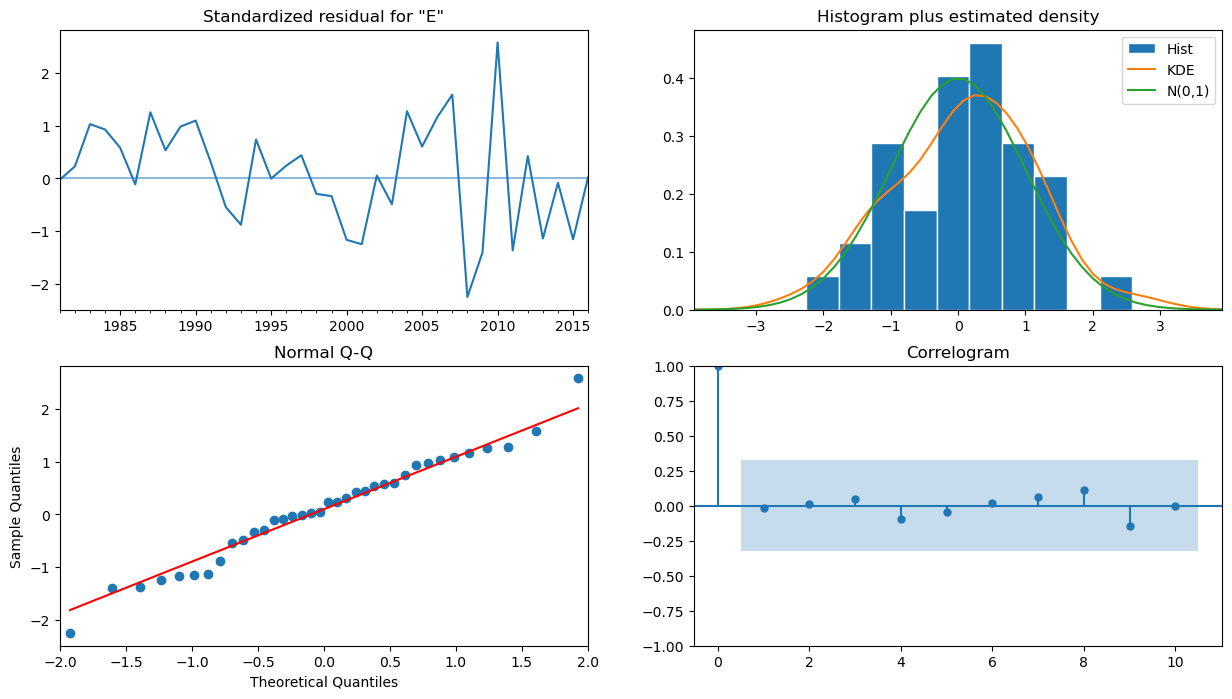

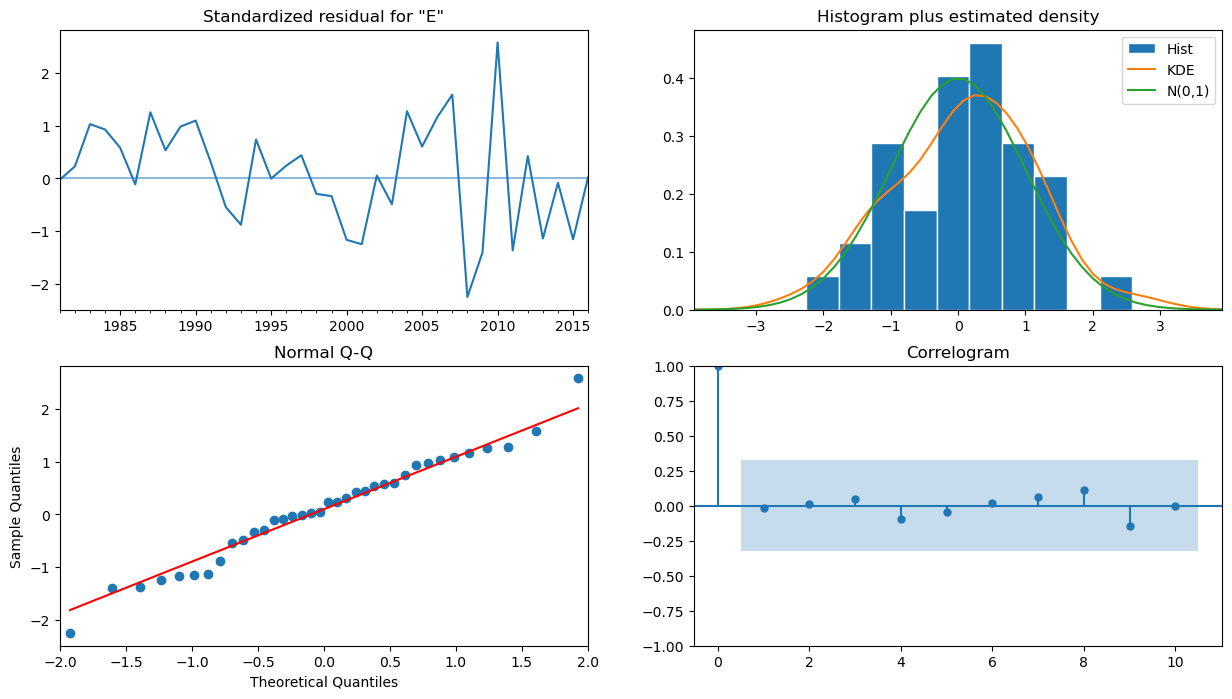

In [49]:
arima_model = SARIMAX(train, order=(1,1,3), simple_differencing=False)
arima_model = arima_model.fit(disp=False)
arima_model.plot_diagnostics(figsize=(15,8))

In [50]:
residuals = arima_model.resid
pvalue = acorr_ljungbox(residuals, np.arange(1,20,1))
print(pvalue)

     lb_stat  lb_pvalue
1   0.002506   0.960072
2   0.003692   0.998155
3   0.117172   0.989700
4   0.156812   0.997082
5   0.169515   0.999408
6   0.179584   0.999887
7   0.342558   0.999843
8   0.374777   0.999956
9   0.398065   0.999989
10  0.491602   0.999994
11  0.492638   0.999999
12  0.583873   0.999999
13  0.731485   0.999999
14  0.754561   1.000000
15  0.756190   1.000000
16  0.761105   1.000000
17  0.761522   1.000000
18  0.870610   1.000000
19  0.993189   1.000000


The ARIMA Model (1,1,3) seems fairly good, the residuals are correlated to white noise.

# Forecasting

In [51]:
def rolling_forecast(data: pd.Series, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    predictions = []

    for i in range(train_len, total_len, window):
        train_data = data[:i]
        
        if method == 'mean':
            mean_val = np.mean(train_data.values)
            predictions.extend([mean_val] * window)
        
        elif method == 'ARIMA':
            model = SARIMAX(train_data, order=(1, 1, 3))
            res = model.fit(disp=False)
            forecast = res.get_forecast(steps=window)
            pred_mean = forecast.predicted_mean
            predictions.extend(pred_mean)
        
        if len(predictions) >= horizon:
            break

    return predictions[:horizon]

# Predicting the next 5 years of Electricy Usage in Japan

In [52]:
TRAIN = len(train)
HORIZON = len(test)
WINDOW = 1

pred_arima = rolling_forecast(japan_data['Electricity Usage'], TRAIN, HORIZON, WINDOW, 'ARIMA')

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN w

In [53]:
predicted_data = pd.DataFrame({'Actual Data': japan_data['Electricity Usage'][-5:]})
predicted_data.head()

,Actual Data
2017,1005.866632
2018,1008.910122
2019,988.982270
2020,960.784695
2021,954.856982


In [54]:
predicted_data['Predicted Data'] = pred_arima
predicted_data.head()

,Actual Data,Predicted Data
2017,1005.866632,1001.940117
2018,1008.910122,993.806358
2019,988.982270,998.044846
2020,960.784695,979.829824
2021,954.856982,959.235388


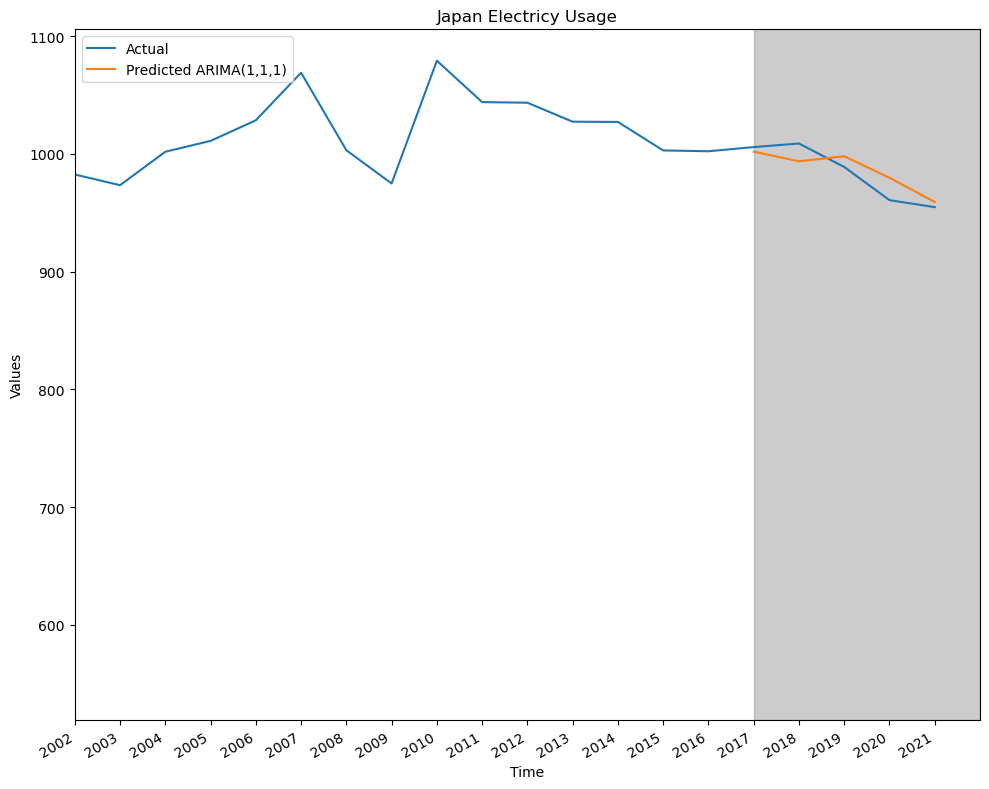

In [55]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(japan_data['Electricity Usage'], label='Actual')
ax.plot(predicted_data['Predicted Data'], label='Predicted ARIMA(1,1,1)')
ax.set_title('Japan Electricy Usage')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.legend(loc=2)
ax.axvspan(37, 42, color="#808080", alpha=0.4)
ax.set_xlim(22,42)
pt.xticks(np.arange(22, 42,1))
fig.autofmt_xdate()
pt.tight_layout()

In [56]:
mse = mean_squared_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 141.51177351623383


In [57]:
mae = mean_absolute_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 10.303278121064682


In [58]:
var = predicted_data['Predicted Data'].std()**2
print(f' Variance: {var}')

 Variance: 303.2221119097165


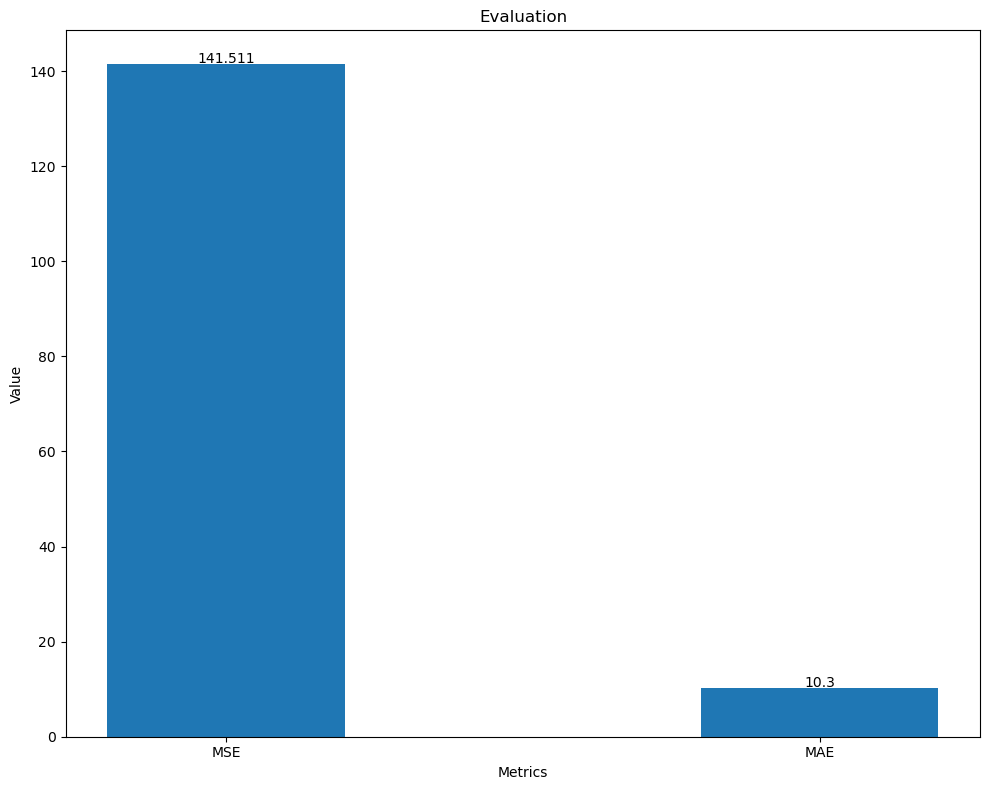

In [61]:
fig, ax = pt.subplots(figsize=(10,8))

X = ['MSE', 'MAE']
y = [141.511, 10.3]

ax.bar(X,y, width=0.4)
ax.set_title('Evaluation')
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')

for index, value in enumerate(y):
    pt.text(x=index, y=value + 0.1, s=str(value), ha='center')

pt.tight_layout()

The ARIMA(1,1,3) model did quite well in predicting the next 5 years of electricity usage in Japan. 